# Import library and datasets

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

# Create the class that contains both the linear and logistic regression methods 

In [123]:
class Regression:
    def __init__(self, lr = 0.01, n_iteration=1000, type = "Linear"):
        self.lr = lr
        self.n_iteration = n_iteration
        self.b = None
        self.b0 = None
        self.type = type

    def fit(self,X_train,Y_train):
        n_sample, n_feature = X_train.shape
        self.b = np.zeros(n_feature)
        self.b0 = 0

        for _ in range(self.n_iteration):
            if self.type == "Linear":
                  y_pred = self.b0 + np.dot(X_train,self.b)
            else :
                  y_pred = self._sigmoid(self.b0 + np.dot(X_train,self.b))
            
            db = (1/n_sample) * np.dot(X_train.T,(y_pred - Y_train))
            db0 = (1/n_sample) * np.sum(y_pred - Y_train)
            self.b -= self.lr * db
            self.b0 -= self.lr * db0

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self,X_test):
        if self.type == "Linear":
            y_pred = self.b0 + np.dot(X_test,self.b)
        else : 
            y_model = self._sigmoid(self.b0 + np.dot(X_test,self.b))
            y_class = [1 if i > 0.5 else 0 for i in y_model]
            y_pred = np.array(y_class)
        return y_pred

# Linear regression example

In [140]:
X , Y = datasets.make_regression(n_samples = 1000, n_features = 1, noise = 20, random_state = 4)
X_train ,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=1234)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
#for i in range(3):
# plt.scatter(X[:,i], Y, color = "b", marker="o", s=30)
# plt.show()

(800, 1)
(800,)
(200, 1)


383.2488464665803


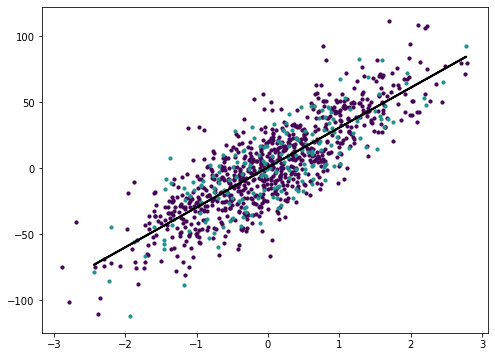

In [142]:
regression = Regression()
regression.fit(X_train,Y_train)
predicted = regression.predict(X_test)
MSE = np.mean((predicted - Y_test)**2)
print(MSE)
## with more than 1 feature/coefficcients the  plot don't work
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train[:,0], Y_train, color=cmap(1), s=10)
m2 = plt.scatter(X_test[:,0], Y_test, color=cmap(0.5), s=10)
plt.plot(X_test[:,0], predicted, color='black', linewidth=2, label="Prediction")
plt.show()

# Logistic regression example

In [121]:
data = datasets.load_breast_cancer()
X, Y = data.data, data.target
X_train ,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=1234)
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [122]:
logistic = Regression(type='Logistic')
logistic.fit(X_train,Y_train)
predictions = logistic.predict(X_test)
print(np.sum(Y_test==predictions)/len(Y_test))



0.9210526315789473


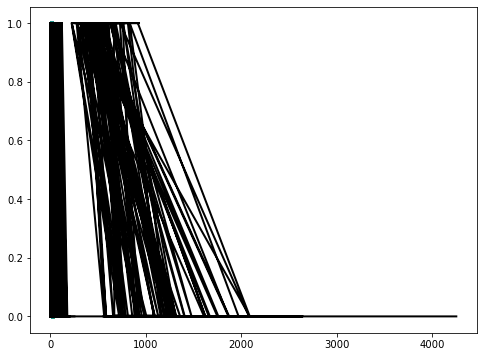

In [112]:
)